# Отчет о проделанной работе
1. Функция RR - готовит белый шум - ячейка 66.
2. Контрольные замеры правильности на исходной выборке и на белом шуме - ячейки 53, 79. Классификация по белому шуму является значительно более трудной задачей для этой модели.
3. Основной цикл по C  - ячейка 72. Число повторов для генерации ковариации с белым шумом - 100.
4. Итоговый график - ячейка 77.

# Выводы

С увеличением гиперпараметра C уменьшается влияние регуляризации и возрастает влияние параметров логистической регрессии. Сложность по Радемахеру монотонно увеличивается и выходит на кривую насыщения. Сложность по Радемахеру в целом невысокая на данной выборке, что соответствует высокой правильности на тестовых выборках при всех значениях С. Это означает, что задача в целом несложная и ошибка обобщения небольшая.


# Задание

Используя определение, оценить сложность по радемахеру 
для логистической регресии на breast cancer dataset из 
scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.

Построить график зависимости сложности по радемахеру от коэф L2 
регуляризации для alpha=np.logspace(-2,2,5).

Для каждой точки выполнить 100 экспериментов, 
на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте предварительно применить к признакам standard scaling.



# Формулы
$ Loss = \min_{ \, \omega, c} \frac{1}{2} \omega^T \omega \, + \, C \sum_{i=1}^n \log(\exp(-y_i (X_i^T \omega + c)) + 1) $

$ z_i = \omega x_i + c $

$ h(x_i) = \frac{1}{1 + \exp(-z_i)} $




# Определение

# Rademacher complexity

Suppose now that the labels $y_i$ are chosen at random without regard to the $x_i$. In other words, suppose we replace each $y_i$ by a random variable $\sigma_i$ that is -1 or +1 with equal probability, independent of everything else. Thus, the $\sigma_i$ represent labels that are pure noise. We can measure how well the space $H$ can fit this noise in expectation $E_{\sigma} [\max_{h \in H} \frac 1 m \sum _{i=1}^m \sigma_i h(x_i)]$, which is called Rademacher complexity.

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

SEED=42

In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
y = data.target

print(data.target_names)
print(data.target.shape)
print(data.data.shape)
print(y[:20])
alpha=np.logspace(-2,2,5)
print(alpha)

y[y==0] = -1
print(y[:20])

scaler = StandardScaler()
X = scaler.fit_transform(data.data)


['malignant' 'benign']
(569,)
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]


In [23]:
a = data.data[:, 1]
print(a[:20])
print(np.mean(a))
print(np.std(a))


[10.38 17.77 21.25 20.38 14.34 15.7  19.98 20.83 21.82 24.04 23.24 17.89
 24.8  23.95 22.61 27.54 20.13 20.68 22.15 14.36]
19.289648506151142
4.297254637090421


In [25]:
a = X[:, 1]
print(a[:20])
print(np.mean(a))
print(np.std(a))

[-2.07333501 -0.35363241  0.45618695  0.25373211 -1.15181643 -0.8353353
  0.16064943  0.35845013  0.58882978  1.10543868  0.91927331 -0.3257076
  1.28229578  1.08449508  0.77266808  1.91991217  0.19555543  0.32354413
  0.66562299 -1.1471623 ]
-6.5684618455151616e-15
1.0000000000000002


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [35]:
C = 1
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.986
Правильность на тестовом наборе: 0.979


In [28]:
C = 100
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.958


In [48]:
C = 0.01
logreg = LogisticRegression(C=C).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

0.9790209790209791
Правильность на обучающем наборе: 0.965
Правильность на тестовом наборе: 0.979


In [30]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.20281331 -0.17412899 -0.20146812 -0.19904442 -0.09227407 -0.08884559
  -0.16690077 -0.21853512 -0.0653056   0.06925087 -0.17509749  0.00087748
  -0.14561898 -0.15708155  0.00465857  0.02817297  0.02071811 -0.04587342
   0.02172166  0.0781341  -0.23314274 -0.21035592 -0.22278638 -0.21696288
  -0.16056587 -0.12513169 -0.17113471 -0.2241984  -0.17052226 -0.060754  ]]
[0.17446343]


In [33]:
def model(x):
    return 1 / (1 + np.exp(-x))

w = logreg.coef_
c = logreg.intercept_

z = np.dot(X_test, w.T) + c
y_prob = model(z).ravel()

pred = np.ones(y_test.shape)
pred[y_prob < 0.5] = -1
#print(pred)
#print(y_test)
accuracy_score(y_test, pred)

0.9790209790209791

In [32]:
def Loss(C, X1, y1):
    w = logreg.coef_
    c = logreg.intercept_
    z = np.dot(X1, w.T) + c

    reg = np.dot(w, w.T).ravel()
    loss = np.log( 1 + np.exp( - z.ravel() * y1 ) )
    return reg + C * np.sum(loss)

In [36]:
print('C=', C)
print('L_S2=', Loss(C, X_train, y_train))
print('L_S1=', Loss(C, X_test, y_test))

C= 1
L_S2= [37.68034841]
L_S1= [23.17392546]


In [66]:
# Белый шум
def RR(n):
    rr = np.ones(n)
    a = np.random.rand(n)
    rr[a < 0.5] = -1
    return rr

M = y.shape[0]
y_rr = RR(M)
m = np.mean(y_rr)
std = np.std(y_rr)
print(m, std, y_rr[:20])

-0.050966608084358524 0.9987003578953877 [-1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1.]


In [42]:
y.shape[0]

569

In [53]:
# Правильность на всей выборке как учебной
C = 100
logreg = LogisticRegression(C=C).fit(X, y)
y_pred = logreg.predict(X)
acc = accuracy_score(y, y_pred)
print(C, acc)

100 0.9912126537785588


In [79]:
y_rr = RR(M)
logreg = LogisticRegression(C=C).fit(X, y_rr)
y_pred = logreg.predict(X)
acc = accuracy_score(y_rr, y_pred)
print(C, acc)


100.0 0.5729349736379613


In [72]:
N = 100
xx = []
yy = []
yy_std = []

M = y.shape[0]

for C in alpha:
    xx.append(C)
    logreg = LogisticRegression(C=C).fit(X, y)
    acc = accuracy_score(y, logreg.predict(X))
    print('C=', C, 'acc=', acc)
    
    zz = []
    for i in range(N):
        y_rr = RR(M)
        logreg = LogisticRegression(C=C).fit(X, y_rr)
        y_pred = logreg.predict(X)
        s = np.dot(y_rr, y_pred) / M
        zz.append(s)
    m = np.mean(zz)        
    std = np.std(zz)        
    yy.append(m)
    yy_std.append(std)


C= 0.01 acc= 0.9701230228471002
C= 0.1 acc= 0.9859402460456942
C= 1.0 acc= 0.9876977152899824
C= 10.0 acc= 0.9912126537785588
C= 100.0 acc= 0.9912126537785588


In [73]:
print(xx)
print(yy)
print(yy_std)

[0.01, 0.1, 1.0, 10.0, 100.0]
[0.11434094903339193, 0.15075571177504393, 0.16442882249560636, 0.16815465729349735, 0.17943760984182774]
[0.03201665224415009, 0.03309233852558181, 0.033197398477413764, 0.035461601059803304, 0.03957507003394901]


In [76]:
print(zz[:5])

[0.21968365553602812, 0.18804920913884007, 0.19507908611599298, 0.1634446397188049, 0.17750439367311072]


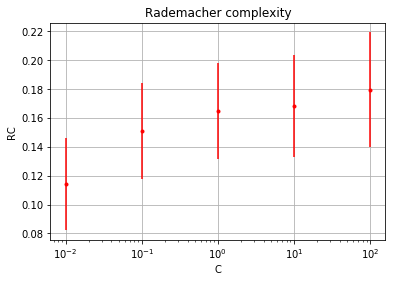

In [77]:
plt.xlabel('C')
plt.ylabel('RC')
plt.title('Rademacher complexity')
#plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.errorbar(xx, yy, yerr=yy_std, fmt='.r');